# Bisection and Newton's Method

## Bisection method

The main idea behind this algorithms is to find the root of a given number N.

For a moment think how does your calculator or the command: np.sqrt() compute the root of a number. 

Suppose $f$ is a continuous function defined on the interval $[a,b]$, with $f(a)$ and $f(b)$ of opposite sign. We know that there exists a number $p$ in $(a,b)$ with $f(p)=0$. 

To find such $p$, set $a_1=a$ and $b_1=b$, and let $p_1$ be the midpoint in between a and b: 

$$p_1=\dfrac{(a_1+b_1)}{2}$$

1) If $f(p_1)=0$, then $p=p_1$, we are done;

2) If $f(p_1)$  and  $f(a_1)$ have the same sign, $p \in (p_1,b_1)$, and we set $a_2=p_1$ and $b_2=b_1$;

3) Similarly, If $f(p_1)$  and  $f(a_1)$ have opposite signs, $p \in (p_1,b_1)$, and we set $a_2=a_1$ and $b_2=p_1$;

4) Iterate the process above in the following intervals: $[a_2, b_2]$, $[a_3, b_3]$...$[a_i, b_i]$;

5) Set the error tolerance, the loop will be terminate if $$\dfrac{(a_i+b_i)}{2}< tolerance.$$

In [98]:
def bisection(a, b, tol, max_it):
    i = 1
    fa = f(a)
    while i <= max_it:
        p = (a + b) / 2.0
        fp = f(p)
        if fp == 0 or (b - a) < tol:
            p_out = p
            print('succeeded with Niterations = ' + str(i))
            return(p)
        i += 1
        if fa * fp > 0:
            a = p
            fa = fp
        else:
            b = p
    print('max num iteration exceeded')
    return(-999)

In [211]:
def f(x):
    #y = x ** 3 + 4 * x ** 2 - 10   
    #y = x ** 2 - 2
    #y = np.tanh(x)**2 + x/2.
    #y = np.log(x)
    y = np.tanh(x)**2 + np.tanh(0.5*x**2) + x/2. - 1.
    return(y)

In [212]:
a = 1
b = 2
p = bisection(a, b, 0.0000001, 10000)
print(p)

print(f(p))

succeeded with Niterations = 25
1.9999999702
1.8933767320507404


## Newton's Method

Newton's method is an iterative process for finding the roots of a function.

The concept is to

- guess a starting $x$ point $(x_1)$
- find a linear equation that's tangent to and passes through $f(x_1)$
- move to the x intercept
- repeat


### Newton's Method in action

Let's use the <i>point-slope</i> form of a linear equation

$$
y - y_1 = m(x - x_1)
$$

We have a point $x_1$ and $f(x_1)=y_1$

and a slope $m= f'(x_1)$

so let's plug in and find the $x$ intercept

$$
y - f(x_1) = f'(x_1)(x - x_1)
$$

Set $y=0$ and solve for $x_2$

$$
 - f(x_1) = f'(x_1)(x_2 - x_1)
$$

$$
-\frac{f(x_1)}{f'(x_1)} = x_2 - x_1
$$

$$
x_2 = x_1 - \frac{f(x_1)}{f'(x_1)}
$$

or in general terms

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

In [213]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-10, 10, 500)

def f_line(f, x, x_n):
    slope = derivative(f, x_n, dx=0.1)
    x_nn = x_n - f(x_n) / slope 
    return slope * (x - x_n) + f(x_n), x_nn

def update_plot(startingpoint, order):
    x_n = startingpoint
    ax.clear()
    ax.plot(x, f(x), label=r'$mystery$')
    ax.axhline(0, color='gray', lw=0.5)

    for i in range(0, order):

        if i >= 1:
            ax.plot(x, f_l, '--', lw=1)
        
        ax.plot(x_n, f(x_n), 'kd', label=r'$f(x_{}={:.3f})={:.4f}$'.format(i + 1, x_n, f(x_n)))
        ax.vlines(x_n, 0, f(x_n), color='black', linestyle=':', lw=1)
        f_l, x_n = f_line(f, x, x_n)

        
    #plt.setp(ax, xticks=[0, 1, 2], xticklabels=['0', '1', '2'],
    #         yticks=[-1, 0, 1], yticklabels=['-1', '0', '+1'])
    ax.set_ylim(-3, 3)
    ax.set_xlim(-8, 8)
    ax.legend(loc="lower right")
    plt.show()

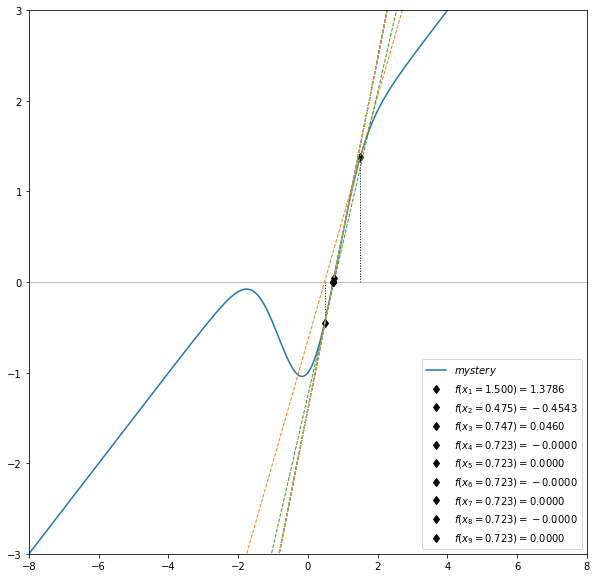

In [216]:
fig, ax = plt.subplots(1,1,figsize=(10, 10))
update_plot(1.5,9)